# Multithreading

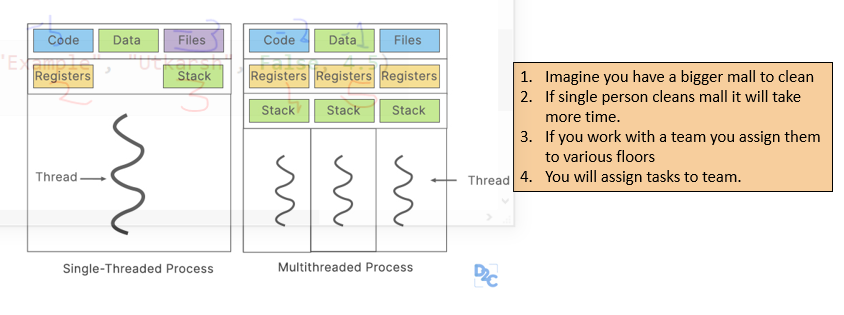

In [1]:
import time

In [2]:
print("Hello!")

Hello!


### time.sleep will add time delay in seconds

In [3]:
time.sleep(3)
print("Hello All")

Hello All


In [5]:
%%time
time.sleep(5)
print("Single Thread")

Single Thread
CPU times: total: 0 ns
Wall time: 5 s


### Creating 2 different functions

In [8]:
def hypotenuse(a, b):
    print("Hypotenuse function started")
    time.sleep(3)
    c = (a**2 + b**2)**(1/2)
    print(f"Hypotenuse of {a} an {b} is {c:.4f}")
    print("Hypotenuse function complete")

In [9]:
%%time
hypotenuse(4, 5)

Hypotenuse function started
Hypotenuse of 4 an 5 is 6.4031
Hypotenuse function complete
CPU times: total: 0 ns
Wall time: 3 s


In [10]:
def simple_intrest(p, n, r):
    print("Simple Intrest function started")
    time.sleep(2)
    i = (p*n*r)/100
    print(f"Given values P = {p} INR, N = {n} years, R = {r} %p.a.")
    print(f"Simple Intrest : {i:.2f} INR")
    print("Simple Intrest function complete")

In [11]:
%%time
simple_intrest(p=50000, n=5, r=7.1)

Simple Intrest function started
Given values P = 50000 INR, N = 5 years, R = 7.1 %p.a.
Simple Intrest : 17750.00 INR
Simple Intrest function complete
CPU times: total: 0 ns
Wall time: 2 s


### Single Theaded execution

In [12]:
%%time
hypotenuse(5, 6) # 3 sec
simple_intrest(p=45000, n=3, r=6.5) # 2 sec

Hypotenuse function started
Hypotenuse of 5 an 6 is 7.8102
Hypotenuse function complete
Simple Intrest function started
Given values P = 45000 INR, N = 3 years, R = 6.5 %p.a.
Simple Intrest : 8775.00 INR
Simple Intrest function complete
CPU times: total: 0 ns
Wall time: 5 s


### Multithreading execution
I want to run hypotenuse and simple intrest functions parallely

In [13]:
from threading import Thread

In [15]:
%%time
# Creating the threads
th1 = Thread(target=hypotenuse, args=(4, 5))
th2 = Thread(target=simple_intrest, args=(67000, 4, 6.8))

# Start the threads
th1.start()
th2.start()

# Wait for all threads to complete the tasks
th1.join()
th2.join()

Hypotenuse function started
Simple Intrest function started
Given values P = 67000 INR, N = 4 years, R = 6.8 %p.a.
Simple Intrest : 18224.00 INR
Simple Intrest function complete
Hypotenuse of 4 an 5 is 6.4031
Hypotenuse function complete
CPU times: total: 0 ns
Wall time: 3.04 s


In [16]:
def print_message(message):
    print("Message function started")
    time.sleep(2)
    print(f"Message : {message}")
    print("Print message function completed")

In [17]:
%%time
print_message("Hi All!")

Message function started
Message : Hi All!
Print message function completed
CPU times: total: 15.6 ms
Wall time: 2 s


In [18]:
%%time
hypotenuse(3, 4) # 3 sec
simple_intrest(50000, 5, 7.5) # 2 sec
print_message("Hello All!") # 2 sec

Hypotenuse function started
Hypotenuse of 3 an 4 is 5.0000
Hypotenuse function complete
Simple Intrest function started
Given values P = 50000 INR, N = 5 years, R = 7.5 %p.a.
Simple Intrest : 18750.00 INR
Simple Intrest function complete
Message function started
Message : Hello All!
Print message function completed
CPU times: total: 31.2 ms
Wall time: 7 s


In [19]:
%%time
# Create threads
th1 = Thread(target=hypotenuse, args=(3, 4))
th2 = Thread(target=simple_intrest, args=(47000, 3, 7.1))
th3 = Thread(target=print_message, args=("Multithreading tasks start parallely",))

# Start the threads
th1.start()
th2.start()
th3.start()

# Wait for all threads to finish
th1.join()
th2.join()
th3.join()

Hypotenuse function startedSimple Intrest function started

Message function started
Given values P = 47000 INR, N = 3 years, R = 7.1 %p.a.
Simple Intrest : 10011.00 INR
Simple Intrest function complete
Message : Multithreading tasks start parallely
Print message function completed
Hypotenuse of 3 an 4 is 5.0000
Hypotenuse function complete
CPU times: total: 15.6 ms
Wall time: 3.01 s


### Single function but multiple values calculation

In [28]:
def square(num):
    time.sleep(3)
    print(f"Square of number {num} is {num**2}\n")

In [29]:
%%time
square(5)

Square of number 5 is 25

CPU times: total: 0 ns
Wall time: 3 s


In [30]:
a = [3, 4, 5, 6, 7]

In [31]:
a

[3, 4, 5, 6, 7]

In [32]:
%%time
for i in a:
    square(i)

Square of number 3 is 9

Square of number 4 is 16

Square of number 5 is 25

Square of number 6 is 36

Square of number 7 is 49

CPU times: total: 0 ns
Wall time: 15 s


### Multithreading for multiple values

In [33]:
b = [5, 6, 7, 8, 9, 10, 11]

In [34]:
b

[5, 6, 7, 8, 9, 10, 11]

In [35]:
%%time
# Create all threads and start threads
threads = []
for i in b:
    th = Thread(target=square, args=(i,))
    th.start()
    threads.append(th)

# Wait for all threads to finish
for th in threads:
    th.join()

Square of number 5 is 25
Square of number 6 is 36


Square of number 7 is 49

Square of number 8 is 64

Square of number 9 is 81

Square of number 11 is 121

Square of number 10 is 100

CPU times: total: 15.6 ms
Wall time: 3.02 s


In [36]:
%%time
# Create all threads and start threads
threads = []
for i in range(1, 100):
    th = Thread(target=square, args=(i,))
    th.start()
    threads.append(th)

# Wait for all threads to finish
for th in threads:
    th.join()

Square of number 1 is 1
Square of number 2 is 4

Square of number 3 is 9

Square of number 5 is 25

Square of number 4 is 16

Square of number 6 is 36

Square of number 7 is 49

Square of number 8 is 64

Square of number 9 is 81

Square of number 11 is 121

Square of number 10 is 100

Square of number 13 is 169

Square of number 12 is 144

Square of number 14 is 196

Square of number 21 is 441

Square of number 16 is 256

Square of number 18 is 324

Square of number 17 is 289

Square of number 19 is 361

Square of number 20 is 400

Square of number 22 is 484

Square of number 15 is 225

Square of number 24 is 576

Square of number 23 is 529

Square of number 25 is 625


Square of number 26 is 676

Square of number 27 is 729

Square of number 28 is 784

Square of number 29 is 841

Square of number 30 is 900

Square of number 31 is 961

Square of number 33 is 1089

Square of number 32 is 1024

Square of number 35 is 1225

Square of number 34 is 1156

Square of number 37 is 1369

Square o

### Practical application - downloading multiple files from given url

In [38]:
url1 = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv


In [39]:
url1.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'main',
 'artifacts',
 'data.csv']

In [40]:
url1.split("/")[-1]

'data.csv'

In [41]:
from urllib.request import urlretrieve

In [42]:
def download_file(url):
    filename = url.split("/")[-1]
    print(f"Starting download for file : {filename} ...")
    urlretrieve(url, filename)
    print(f"{filename} Download complete")

In [44]:
url1

'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv'

In [45]:
%%time
download_file(url1)

Starting download for file : data.csv ...
data.csv Download complete
CPU times: total: 141 ms
Wall time: 1.7 s


### Downloading files from multiple urls

In [46]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv"
]

In [48]:
%%time
for i in urls:
    download_file(i)    

Starting download for file : data.csv ...
data.csv Download complete
Starting download for file : test.csv ...
test.csv Download complete
Starting download for file : train.csv ...
train.csv Download complete
CPU times: total: 219 ms
Wall time: 3.17 s


### With multithreading

In [52]:
%%time
# Create and start the threads
threads = []
for i in urls:
    th = Thread(target=download_file, args=(i,))
    th.start()
    threads.append(th)

# Wait for all threads to finish
for th in threads:
    th.join()

Starting download for file : data.csv ...
Starting download for file : test.csv ...
Starting download for file : train.csv ...
test.csv Download complete
data.csv Download complete
train.csv Download complete
CPU times: total: 344 ms
Wall time: 979 ms
